In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import seaborn as sns
sns.set_context("paper")
sns.set_style("ticks");

(monte-carlo-method)=
# The Monte Carlo Method for Estimating Expectations

The Monte Carlo method was invented by Stanislaw Ulam and John von Neumann in the 1940s.
It is a method for estimating the expectation of a random variable.
The Monte Carlo method is based on the law of large numbers, which we will discuss in this lecture.

(law-of-large-numbers)=
## The law of large numbers

Take an infinite series of independent random variables $X_1,X_2,\dots$ with the same distribution, any distribution.
Such a sequence of random variables is typically called an iid sequence for *independent identically distributed*.
Let $\mu = \mathbb{E}[X_i]$ be the common mean of these random variables.
The *strong law of larger numbers* states the sampling average,

$$
\bar{X}_N = \frac{X_1+\dots X_N}{N} = \frac{1}{N}\sum_{i=1}^NX_i,
$$

converges almost surely to $\mu$ as the number of samples $N$ goes to infinity.
Mathematically, we write:

$$
\bar{X}_N=\frac{1}{N}\sum_{i=1}^NX_i\rightarrow \mu\;\text{a.s.}
$$

The a.s. (almost surely) is a technical term from measure theory which means that the probability of this convergence happening is one.

The proof of the strong law of large numbers is beyond the scope of this course.
To learn it you need to take a course in probability theory.
But we can demonstrate the law of large numbers with a simple example.

### Demonstration of the law of large numbers with a synthetic example
Let's demonstrate the law of large numbers.
We are going to take a Beta random variable:

$$
X\sim\text{Beta}(\alpha,\beta),
$$

where $\alpha$ and $\beta$ are positive numbers.
We know that the expectation of the Beta is (see [wiki](https://en.wikipedia.org/wiki/Beta_distribution)):

$$
\mathbb{E}[X] = \frac{\alpha}{\alpha + \beta}.
$$

Let's test if the law of large numbers holds:

In [2]:
import scipy.stats as st

# Create a Beta:
alpha = 2.0
beta = 3.0
X = st.beta(alpha, beta)

# The number of samples to take
N = 5
x_samples = X.rvs(N)

# Find the real mean (expectation):
mu = X.mean()
# Find the sampling estimate of the mean:
x_bar = x_samples.mean()

# Print the results
print(f"E[X] = {mu:.4f}")
print(f"The law of large numbers with N={N:d} samples estimates it as: {x_bar:.4f}")

E[X] = 0.4000
The law of large numbers with N=5 samples estimates it as: 0.3940


### Questions

+ Increase the number of samples $N$ until you get closer to the correct answer with four significant digits.

## The Monte Carlo method for estimating integrals
Now we will use the law of large numbers to evaluate integrals.
In particular, we will start with this integral:

$$
I = \mathbb{E}[g(X)]=\int g(x) p(x) dx,
$$

where $X\sim p(x)$ and $g(x)$ is a function of $x$.
Let $X_1,X_2,\dots$ be independent copies of $X$.
Then consider the random variables $Y_1 = g(X_1), Y_2 = g(X_2), \dots$
These random variables are also independent and identically distributed.
So, the strong law of large numbers holds for them, and we get that their sampling average converges to their mean:

$$
\bar{I}_N=\frac{g(X_1)+\dots+g(X_N)}{N}=\frac{Y_1+\dots+Y_N}{N}\rightarrow I,\;\text{a.s.}
$$

This is the *Monte Carlo way of estimating integrals*.

### Example: 1D expectation
Let's try it out with a test function in 1D (Example 3.4 of Robert & Casella (2004)).
Assume that $X\sim\mathcal{U}([0,1])$ and pick:

$$
g(x) = \left(\cos(50x) + \sin(20x)\right)^2.
$$

The correct value for the expectation is:

$$
\mathbb{E}[g(x)] = 0.965.
$$

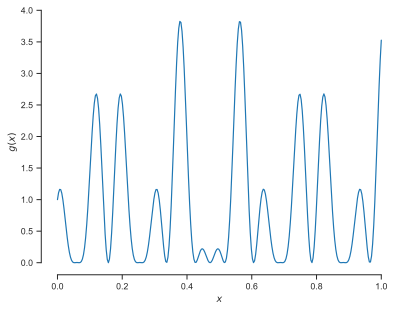

In [4]:
import numpy as np

# Define the function
g = lambda x: (np.cos(50 * x) + np.sin(20 * x)) ** 2

# Let's visualize is first
fig, ax = plt.subplots()
x = np.linspace(0, 1, 300)
ax.plot(x, g(x))
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$g(x)$")
sns.despine(trim=True);

Let's take the samples:

In [5]:
N = 100  
x_samples = np.random.rand(N)
y_samples = g(x_samples)

Evaluate the sample average for all sample sizes (see [cumsum](https://docs.scipy.org/doc/numpy/reference/generated/numpy.cumsum.html)).

In [6]:
I_running = np.cumsum(y_samples) / np.arange(1, N + 1)
I_running

array([0.52406206, 0.81800789, 0.75594878, 0.5677495 , 0.57665394,
       0.70985816, 0.92183615, 0.83204098, 0.7400674 , 0.71950184,
       0.90818319, 0.89987081, 0.83152931, 0.78106397, 0.90975064,
       0.85341739, 0.84880845, 0.82879967, 0.97701889, 0.92853294,
       0.93882247, 0.91442482, 0.98934916, 0.97733504, 1.02263209,
       0.98706031, 0.99316756, 1.05159158, 1.10617806, 1.1028344 ,
       1.16365583, 1.13068838, 1.10442139, 1.07484765, 1.05104328,
       1.08152009, 1.15358815, 1.12386226, 1.09565197, 1.06826357,
       1.04499652, 1.03247996, 1.0085673 , 1.00782725, 1.01272981,
       0.99120796, 0.98779115, 0.99704029, 1.05303737, 1.03197825,
       1.02871785, 1.0554605 , 1.04152374, 1.02993942, 1.01773562,
       1.00320694, 1.02124396, 1.06968995, 1.06125034, 1.04669675,
       1.02954706, 1.01748687, 1.00397331, 0.99168972, 1.01186324,
       1.03812793, 1.05086796, 1.04767189, 1.03324645, 1.03500325,
       1.03526423, 1.02492264, 1.01146554, 0.99780194, 0.98450

Plot this:

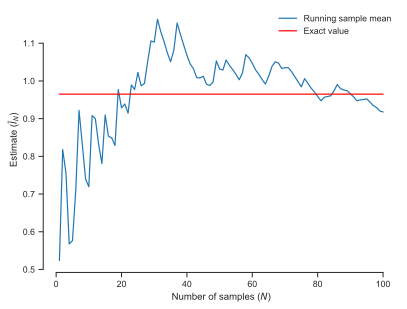

In [8]:
fig, ax = plt.subplots()
ax.plot(np.arange(1, N+1), I_running, label="Running sample mean")
ax.plot(np.arange(1, N+1), [0.965] * N, color="r", label="Exact value")
ax.set_xlabel(r"Number of samples ($N$)")
ax.set_ylabel(r"Estimate ($\bar{I}_N$)")
plt.legend(loc="best", frameon=False)
sns.despine(trim=True);

### Questions

+ Increase ``N`` until you get an answer close enough to the correct answer (the red line).
+ Reduce ``N`` back to a small number, say 1,000. Run the code 2-3 times to observe that you get a slightly different answer every time...